In [1]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
import math

# PART 1  -  CONTRAST ENHANCEMENT

## (a) Full scale contrast stretching(FSCS)

### IISCMain image FSCS

(512, 512)
157


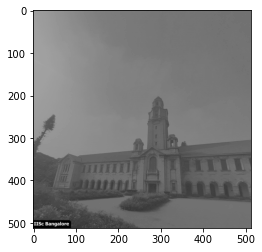

In [139]:
img1 = skimage.io.imread('./images/IISCMain.png')
plt.imshow(img1,cmap='gray')
print(img1.shape)
print(img1[5][6])

In [143]:
x=[]

In [144]:
# Create histogram
for i in range(0,img1.shape[0]):
    for j in range(0,img1.shape[1]):
        x.append(img1[i][j])

In [145]:
b1=max(x)

In [146]:
a1=min(x)

(array([1.14200e+03, 1.54000e+02, 2.01640e+04, 4.51400e+04, 1.12684e+05,
        6.74210e+04, 1.51720e+04, 2.20000e+01, 4.30000e+01, 2.02000e+02]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

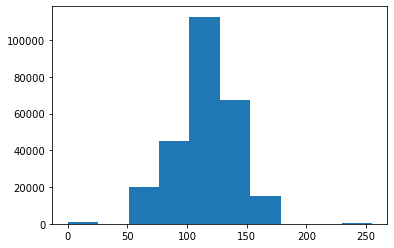

In [147]:
plt.hist(x)

Histogram before Full Scale Contrast Stretching

In [149]:
J = np.zeros((img1.shape[0],img1.shape[1]))

In [151]:
#FULL SCALE CONTRAST STRETCHING
for i in range(0,img1.shape[0]):
    for j in range(0,img1.shape[1]):
        J[i][j] = (255/(b1-a1))*(img1[i][j]-a1)

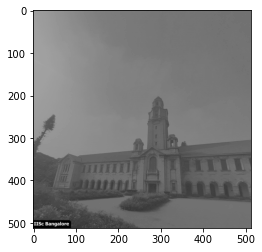

In [152]:
plt.imshow(J,cmap='gray')

(array([1.14200e+03, 1.54000e+02, 2.01640e+04, 4.51400e+04, 1.12684e+05,
        6.74210e+04, 1.51720e+04, 2.20000e+01, 4.30000e+01, 2.02000e+02]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

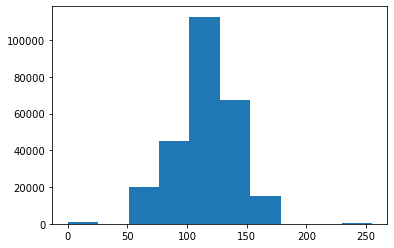

In [153]:
x=[]
for i in range(0,J.shape[0]):
    for j in range(0,J.shape[1]):
        x.append(J[i][j])
plt.hist(x)

Histogram after Full Scale Contrast Stretching

### ECE image FSCS

(796, 600)
134


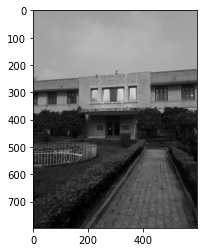

In [155]:
img2 = skimage.io.imread('./images/ECE.png')
plt.imshow(img2,cmap='gray')
print(img2.shape)
print(img2[5][6])

In [156]:
y=[]

In [157]:
for i in range(0,img2.shape[0]):
    for j in range(0,img2.shape[1]):
        y.append(img2[i][j])

In [158]:
b2=max(y)

In [159]:
a2=min(y)

(array([7.63170e+04, 9.31070e+04, 5.15640e+04, 4.94380e+04, 2.55730e+04,
        2.36860e+04, 1.35332e+05, 2.10370e+04, 1.48500e+03, 6.10000e+01]),
 array([ 79. ,  87.7,  96.4, 105.1, 113.8, 122.5, 131.2, 139.9, 148.6,
        157.3, 166. ]),
 <BarContainer object of 10 artists>)

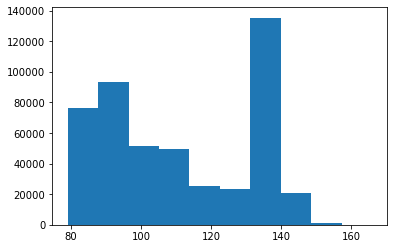

In [160]:
plt.hist(y)

Histogram before Full Scale Contrast Stretching

In [161]:
#FULL SCALE CONTRAST STRETCHING
J2 = np.zeros((img2.shape[0],img2.shape[1]))
for i in range(0,img2.shape[0]):
    for j in range(0,img2.shape[1]):
        J2[i][j] = (255/(b2-a2))*(img2[i][j]-a2)

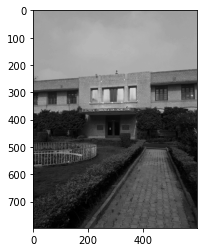

In [162]:
plt.imshow(J2,cmap='gray')

(array([7.63170e+04, 9.31070e+04, 5.15640e+04, 4.94380e+04, 2.55730e+04,
        2.36860e+04, 1.35332e+05, 2.10370e+04, 1.48500e+03, 6.10000e+01]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

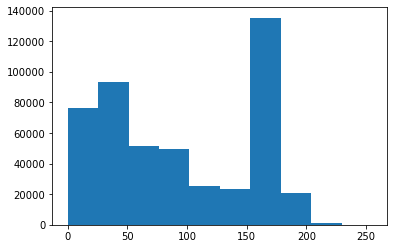

In [163]:
y=[]
for i in range(0,J2.shape[0]):
    for j in range(0,J2.shape[1]):
        y.append(J2[i][j])
plt.hist(y)

Histogram after Full Scale Contrast Stretching

### Conclusion

Full scale contrast stretching works well for 2nd image and not for 1st image because 1st image already has intensity over 0 to 255 but 2nd image intensity is not fully stretched

## Saturated Contrast Stretching(SCS)

(512, 512)
157


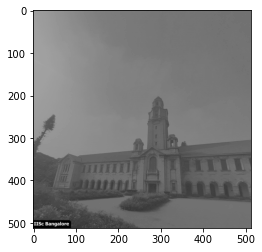

In [2]:
img = skimage.io.imread('./images/IISCMain.png')
plt.imshow(img,cmap='gray')
print(img.shape)
print(img[5][6])

In [58]:
y=np.zeros(256)

In [59]:
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        y[img[i][j]]=y[img[i][j]]+1

In [60]:
p_k=y/(img.shape[0]*img.shape[1])

In [61]:
P_k=np.zeros(256)

In [62]:
for i in range(1,256):
    P_k[i] = P_k[i-1]+p_k[i]

In [63]:
P_k.max()

0.9960403442382812

In [95]:
# Discarding very less pixels having lower and higher intensities
flg1=0
flg2=0
for i in range(0,256):
    if P_k[i]>0.005 and flg1==0:
        Tl = i
        flg1=1
    if P_k[i]>=0.995 and flg2==0:
        Tu = i
        flg2=2
    if flg1==1 and flg2==1:
        break
        

The above values of 0.005 and 0.995 as lower limit and higher limit of offset are choosen after trial and error 
and then taking the best of options

In [96]:
#SATURATED CONTRAST STRETCHING
J = np.zeros((img.shape[0],img.shape[1]))
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if img[i][j]<Tu and img[i][j]>Tl:
            J[i][j] = (255/(Tu-Tl))*(img[i][j]-Tl)
        else:
            J[i][j]=img[i][j]

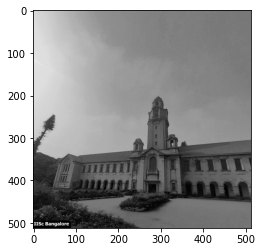

In [97]:
plt.imshow(J,cmap='gray')

(array([11921., 19123., 22135., 22068., 50106., 59768., 35586., 24771.,
        16370.,   296.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

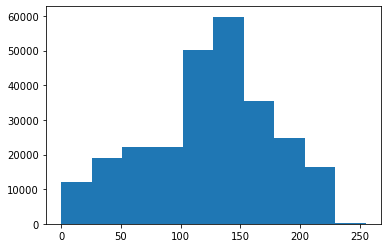

In [98]:
y=[]
for i in range(0,J.shape[0]):
    for j in range(0,J.shape[1]):
        y.append(J[i][j])
plt.hist(y)

Now even for 1st image we are able to do contrast stretch

## (b) Histogram Equalization

(288, 384)

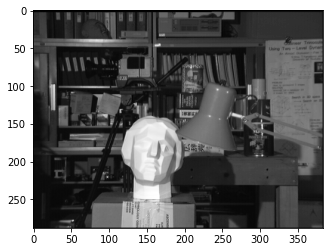

In [175]:
# Reading Images
img = skimage.io.imread('./images/StoneFace.png')
plt.imshow(img,cmap='gray')
img.shape

Image before histogram equalization

In [165]:
img.max()

253

In [166]:
img.min()

0

In [167]:
x=np.zeros(256)

In [168]:
# creating array of intensities and their frequencies
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        x[img[i][j]]=x[img[i][j]]+1

In [169]:
# probability of intensities
p_k = x/(img.shape[0]*img.shape[1])

In [170]:
p_k

array([1.80844907e-05, 2.44140625e-04, 1.88078704e-03, 4.73813657e-03,
       2.90256076e-03, 6.96252894e-04, 7.23379630e-04, 1.32016782e-03,
       4.87377025e-03, 1.02629485e-02, 1.64388021e-02, 1.85637297e-02,
       2.24880642e-02, 1.88802083e-02, 1.68366609e-02, 1.47207755e-02,
       1.42324942e-02, 1.36085793e-02, 1.26862703e-02, 1.21437355e-02,
       1.21708623e-02, 1.20171441e-02, 1.17820457e-02, 9.72041377e-03,
       8.09280961e-03, 7.01678241e-03, 7.02582465e-03, 7.45985243e-03,
       9.91934317e-03, 1.14022714e-02, 1.22341580e-02, 1.05432581e-02,
       9.10554109e-03, 7.82154225e-03, 7.37847222e-03, 7.60452836e-03,
       7.63165509e-03, 7.26996528e-03, 6.41999421e-03, 5.92267072e-03,
       6.26627604e-03, 6.13064236e-03, 6.29340278e-03, 6.13064236e-03,
       7.14337384e-03, 8.41833044e-03, 1.03985822e-02, 1.30389178e-02,
       1.40787760e-02, 1.43952546e-02, 1.12937645e-02, 8.72576678e-03,
       6.98061343e-03, 6.42903646e-03, 6.15776910e-03, 6.32052951e-03,
      

In [171]:
# CDF of intensities of img
P_k=np.zeros(256)
P_k[0]=p_k[0]
for i in range(1,256):
    P_k[i]=P_k[i-1]+p_k[i]

In [172]:
P_k

array([1.80844907e-05, 2.62225116e-04, 2.14301215e-03, 6.88114873e-03,
       9.78370949e-03, 1.04799624e-02, 1.12033420e-02, 1.25235098e-02,
       1.73972801e-02, 2.76602286e-02, 4.40990307e-02, 6.26627604e-02,
       8.51508247e-02, 1.04031033e-01, 1.20867694e-01, 1.35588469e-01,
       1.49820964e-01, 1.63429543e-01, 1.76115813e-01, 1.88259549e-01,
       2.00430411e-01, 2.12447555e-01, 2.24229601e-01, 2.33950014e-01,
       2.42042824e-01, 2.49059606e-01, 2.56085431e-01, 2.63545284e-01,
       2.73464627e-01, 2.84866898e-01, 2.97101056e-01, 3.07644314e-01,
       3.16749855e-01, 3.24571398e-01, 3.31949870e-01, 3.39554398e-01,
       3.47186053e-01, 3.54456019e-01, 3.60876013e-01, 3.66798683e-01,
       3.73064959e-01, 3.79195602e-01, 3.85489005e-01, 3.91619647e-01,
       3.98763021e-01, 4.07181351e-01, 4.17579933e-01, 4.30618851e-01,
       4.44697627e-01, 4.59092882e-01, 4.70386646e-01, 4.79112413e-01,
       4.86093027e-01, 4.92522063e-01, 4.98679832e-01, 5.05000362e-01,
      

In [176]:
J=np.zeros((img.shape[0],img.shape[1])) 

In [177]:
#HISTOGRAM EQUALIZATION
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        J[i][j]=P_k[img[i][j]]

In [178]:
J.min()

1.808449074074074e-05

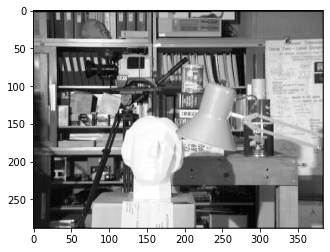

In [180]:
#Image without contrast stretch
J1 = J*255
plt.imshow(J,cmap='gray')

Image after histogram equalization but without contrast stretch

In [181]:
J1.min()

0.004611545138888889

In [184]:
#Image with contrast stretch
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        J1[i][j]=(J[i][j]-J.min())/(1-J.min())*255

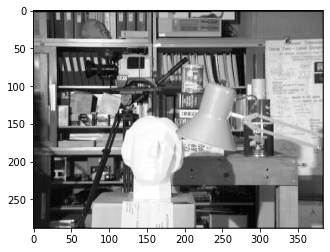

In [185]:
plt.imshow(J1,cmap='gray')

Image after histogram equalization with contrast stretch

In [186]:
J1.min()

0.0

# PART 2

## Upsampling and interpolation

(227, 400)

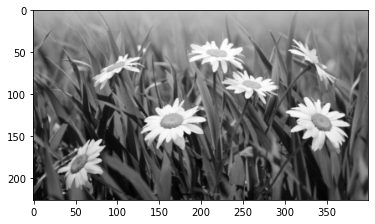

In [189]:
# Reading Images
img = skimage.io.imread('./images/flowers.png')
plt.imshow(img,cmap='gray')
img.shape

In [190]:
J = np.zeros((int(img.shape[0]/3),int(img.shape[1]/3)))

Downsampling the image by a factor of 3

In [191]:
# Downsampling
for i in range(0,int(img.shape[0]/3)):
    for j in range(0,int(img.shape[1]/3)):
        J[i][j]=img[3*i][3*j]

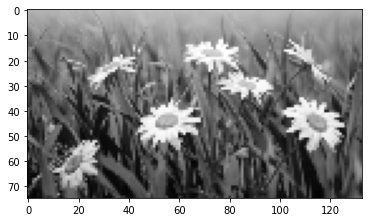

In [192]:
plt.imshow(J,cmap='gray')

Downsampled image

In [193]:
J1 = np.zeros((J.shape[0]*3,J.shape[1]*3))

In [194]:
J1.shape

(225, 399)

Upsampling the downsampled image with nearest neighbour interpolation

In [195]:
# Upsampling with nearest neighbour interpolation
for i in range(0,J.shape[0]*3):
    for j in range(0,J.shape[1]*3):
        if round(i/3)<J.shape[0] and round(j/3)<J.shape[1]:
            J1[i][j]=J[round(i/3)][round(j/3)]
        elif round(i/3)>=J.shape[0] and round(j/3)>=J.shape[1]:
            J1[i][j]=J[int(i/3)][int(j/3)]
        elif round(i/3)>=J.shape[0]:
            J1[i][j]=J[int(i/3)][round(j/3)]
        else:
            J1[i][j]=J[round(i/3)][int(j/3)]
                
                

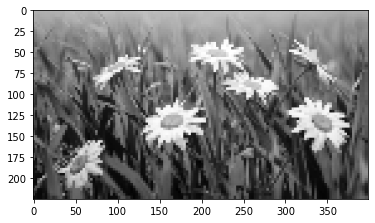

In [196]:
plt.imshow(J1,cmap='gray')

nearest neighbour interpolated image

In [197]:
J2 = np.zeros((J.shape[0]*3,J.shape[1]*3))

In [198]:
J2.shape

(225, 399)

Upsampling the downsampled image with bilinear interpolation

In [199]:
# Upsampling with bilinear interpolation
for i in range(0,J.shape[0]*3):
    for j in range(0,J.shape[1]*3):
        i1 = math.floor(i/3)
        i2 = math.ceil(i/3)
        j1 = math.floor(j/3)
        j2 = math.ceil(j/3)
        if i2<J.shape[0] and j2<J.shape[1] and i1!=i2 and j1!=j2:
            P=np.array([[J[i1][j1]], [J[i1][j2]], [J[i2][j1]], [J[i2][j2]]])
            M = np.array([[1,i1,j1,i1*j1],[1,i1,j2,i1*j2],[1,i2,j1,i2*j1],[1,i2,j2,i2*j2]])
            A = np.linalg.inv(M)@P
            J2[i][j]=A[0] + A[1]*(i/3)+ A[2]*(j/3) + A[3]*(i*j/9)
        elif i2<J.shape[0] and j2<J.shape[1] and i1==i2 and j1==j2:
            J2[i][j]=J[i1][j1]
        elif i2<J.shape[0] and j2<J.shape[1] and i1==i2:
            J2[i][j]=(j/3-j1)/(j2-j1)*(J[i1][j2]-J[i1][j1])+J[i1][j1]
        elif i2<J.shape[0] and j2<J.shape[1] and j1==j2:
            J2[i][j]=(i/3-i1)/(i2-i1)*(J[i1][j1]-J[i2][j1])+J[i2][j1]
        else:
            J2[i][j]=0
        

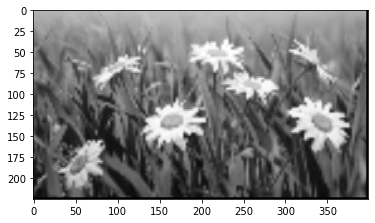

In [200]:
plt.imshow(J2,cmap='gray')

bilinear interpolated image

# PART 3 SPATIAL DOMAIN FILTERING

(800, 800)

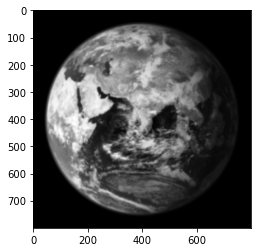

In [99]:
# Reading Images
img = skimage.io.imread('./images/blur.png')
plt.imshow(img,cmap='gray')
img.shape

(800, 800)

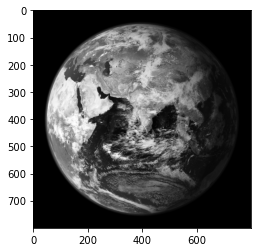

In [100]:
# Reading Images
orig = skimage.io.imread('./images/earth.png')
plt.imshow(orig,cmap='gray')
orig.shape

In [102]:
# Initialising Filters
W = 1/9*np.ones((3,3))
n=3 #filter shape
J=np.zeros((img.shape[0],img.shape[1]))

In [103]:
#Smoothening
tmp = int(n/2)
for i in range(tmp,img.shape[0]-tmp):
    for j in range(tmp,img.shape[1]-tmp):
        sum = 0
        for k in range(0,n):
            for l in range(0,n):
                sum=sum+img[i+k-int(n/2)][j+l-int(n/2)]*W[k][l]
        J[i][j]=sum

In [128]:
#g_mask is sharpness details
g_mask=img-J
#Sharpened image
g = img + 8*g_mask

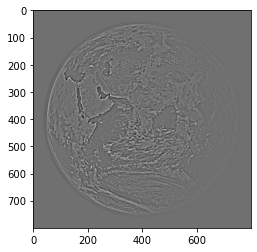

In [129]:
plt.imshow(g_mask,cmap='gray')

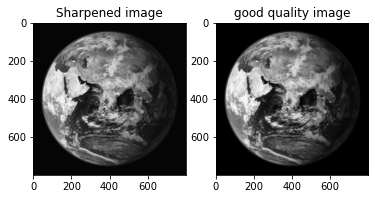

In [130]:
plt.subplot(1,2,1)
plt.title('Sharpened image')
plt.imshow(g,cmap='gray')
plt.subplot(1,2,2)
plt.title('good quality image')
plt.imshow(orig,cmap='gray')

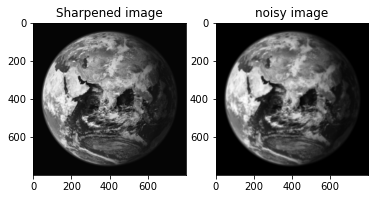

In [131]:
plt.subplot(1,2,1)
plt.title('Sharpened image')
plt.imshow(g,cmap='gray')
plt.subplot(1,2,2)
plt.title('noisy image')
plt.imshow(img,cmap='gray')

In [132]:
M=img.shape[0]
N=img.shape[1]

In [134]:
# Finding error between sharpened image and good quality image
error = 0
for i in range(0,M):
    for j in range(0,N):
        error = error + (img[i][j]-g[i][j])**2
error/(M*N)     

29.720437037049816

In [139]:
# Finding error between noisy image and good quality image
error = 0
for i in range(0,M):
    for j in range(0,N):
        error = error + (img[i][j]-orig[i][j])**2/(M*N)
        
   

C:\Users\HP\AppData\Local\Temp\ipykernel_12656\2049589919.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  error = error + (img[i][j]-orig[i][j])**2/(M*N)


In [140]:
error

16264.263624986874

We can see from above error values that sharpening has reduced the error by a large amount